# Bank Marketing Campaign Prediction using Decision Tree Classifier

This project leverages the Bank Marketing dataset to build a Decision Tree Classification model that predicts whether a customer will subscribe to a term deposit based on their personal and contact attributes. The goal is to optimize marketing efforts by identifying the most promising leads, reducing unnecessary calls, and improving campaign efficiency. The model is visualized and evaluated using multiple performance metrics and insights extracted from decision rules.

1. Install Libraries

These libraries are required to handle data preprocessing, model building, and plotting tasks.

In [2]:
!pip install pandas scikit-learn matplotlib seaborn

2. Import Libraries

Imports necessary Python packages for data handling, Machine Learning and for visualisation.

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import seaborn as sns

3. Load Dataset

Loads the dataset that contains bank client details for deposit subscription prediction.

In [5]:
# Dataset Loading
df = pd.read_csv("bank-full.csv", sep=';')

# Preview
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


4. Encode Categorical Variables

Uses LabelEncoder to convert categorical variables into numeric form for model compatibility. All object-type columns are encoded and stored for later decoding if needed.

In [6]:
# Encode categorical variables using LabelEncoder
label_encoders = {}

for col in df.select_dtypes(include='object'):
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Encoded columns
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


5. Visualise Target Distribution

Pie chart to show the proportion of clients who subscribed to the deposit scheme. This helps identify class imbalance issues before training.

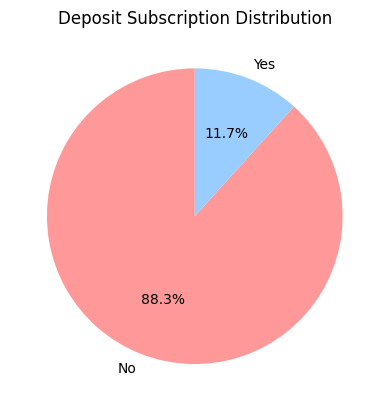

In [7]:
df['y'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['No', 'Yes'], colors=['#FF9999','#99CCFF'])
plt.title('Deposit Subscription Distribution')
plt.ylabel('')
plt.show()

6. Prepare Data and Train Model

Splits data into features (X) and target (y), then divides it into training and testing sets using a 70-30 split. Finally, it trains a Decision Tree Classifier with a maximum depth of 4 on the training data.

In [24]:
# Features and target
X = df.drop("y", axis=1)
y = df["y"]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Decision Tree
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

7. Plot Feature Importance

Plots a bar chart showing feature importances as learned by the Decision Tree. This identifies which features contribute most to deposit prediction decisions.

/tmp/ipython-input-13-1691550031.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feat_imp, y=feat_imp.index, palette="Blues_r")


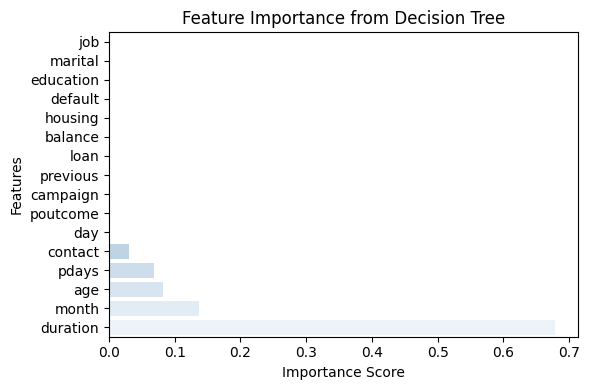

In [13]:
# Feature Importance
feature_names = X.columns
importances = tree.feature_importances_

feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=True)

plt.figure(figsize=(6, 4))
sns.barplot(x=feat_imp, y=feat_imp.index, palette="Blues_r")
plt.title("Feature Importance from Decision Tree")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

8. Visualise Decision Tree

Displays the full Decision Tree using plot_tree with feature and class names labelled. This provides a clear visual interpretation of the model’s decision rules.

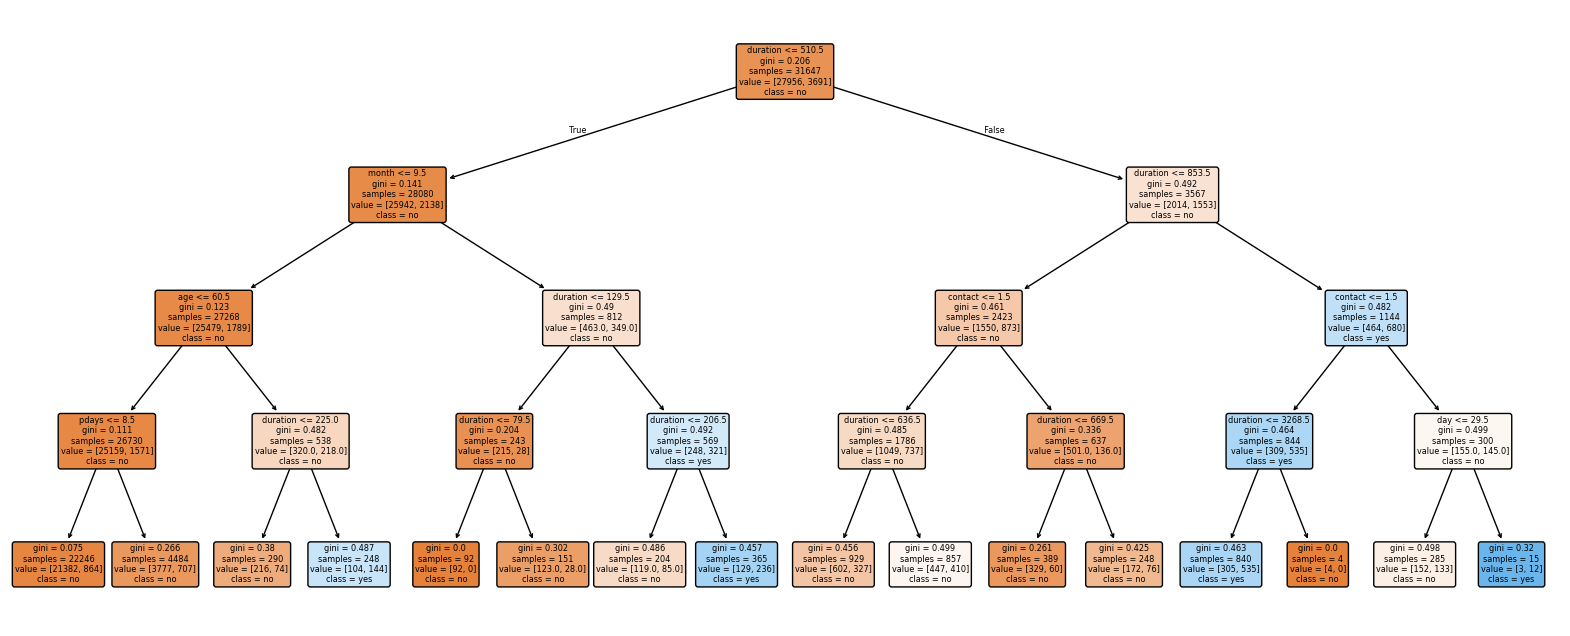

In [14]:
# Decision tree
plt.figure(figsize=(20, 8))
plot_tree(tree,
          feature_names=X.columns,
          class_names=["no", "yes"],
          filled=True,
          rounded=True)
plt.show()

9. Calculate Model Accuracy

Prints the training and testing accuracy to evaluate model performance. These scores indicate how well the model has learned and generalised.

In [15]:
# Accuracy
print("Training Accuracy:", tree.score(X_train, y_train))
print("Testing Accuracy:", tree.score(X_test, y_test))

Training Accuracy: 0.8955667203842387
Testing Accuracy: 0.888897080507225


10. Display Confusion Matrix

Plots the confusion matrix for test predictions to visualise classification performance. It shows correct and incorrect predictions for each class.

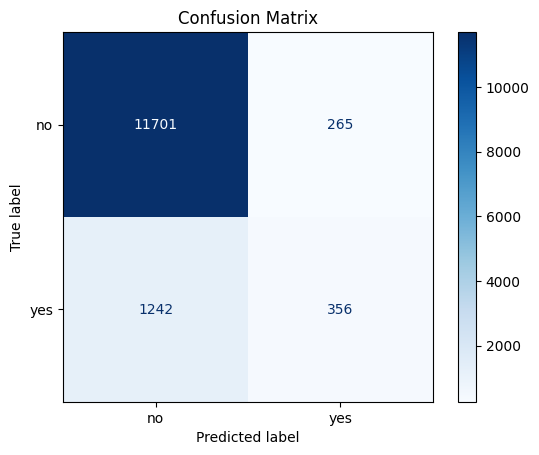

In [21]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["no", "yes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

11. Export Decision Tree Rules

Prints human-readable decision rules extracted from the trained Decision Tree. This helps in understanding the logic behind the model's decisions.

In [23]:
# Decision Tree Rules (Text View)
from sklearn.tree import export_text

tree_rules = export_text(tree, feature_names=list(X.columns))
print(tree_rules)

|--- duration <= 510.50
|   |--- month <= 9.50
|   |   |--- age <= 60.50
|   |   |   |--- pdays <= 8.50
|   |   |   |   |--- class: 0
|   |   |   |--- pdays >  8.50
|   |   |   |   |--- class: 0
|   |   |--- age >  60.50
|   |   |   |--- duration <= 225.00
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  225.00
|   |   |   |   |--- class: 1
|   |--- month >  9.50
|   |   |--- duration <= 129.50
|   |   |   |--- duration <= 79.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  79.50
|   |   |   |   |--- class: 0
|   |   |--- duration >  129.50
|   |   |   |--- duration <= 206.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  206.50
|   |   |   |   |--- class: 1
|--- duration >  510.50
|   |--- duration <= 853.50
|   |   |--- contact <= 1.50
|   |   |   |--- duration <= 636.50
|   |   |   |   |--- class: 0
|   |   |   |--- duration >  636.50
|   |   |   |   |--- class: 0
|   |   |--- contact >  1.50
|   |   |   |--- duration <= 669.50
|   |   |   |   |---